In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diamonds.csv')
df.head()

,id,url,shape,price,carat,cut,colour,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


In [2]:
df.corr()

,id,price,carat
id,1.000000,0.053443,0.073112
price,0.053443,1.000000,0.612356
carat,0.073112,0.612356,1.000000


In [151]:
pivot_table = df.pivot_table(values='carat', aggfunc = 'mean', index='colour', columns='clarity')
pivot_table

clarity,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
colour,,,,,,,
D,0.637221,0.600445,0.787750,0.644367,0.589721,0.631377,0.657140
E,0.511844,0.657685,0.804910,0.857326,0.712663,0.587633,0.716481
F,0.528435,0.773743,0.844107,0.910346,0.820818,0.621781,0.788692
G,0.563286,0.893470,1.027497,1.022403,0.982433,0.699588,0.857280
H,0.599926,0.982038,1.145557,1.055472,1.052510,0.751707,0.897407
I,0.616454,1.240961,1.305366,1.185557,1.283624,0.813594,1.058660
J,0.779750,1.360078,1.318524,1.392591,1.408297,0.828388,1.181132


In [152]:
pivot_table = pivot_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
pivot_table

clarity,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
colour,,,,,,,
D,0.787750,0.600445,0.589721,0.644367,0.657140,0.631377,0.637221
E,0.804910,0.657685,0.712663,0.857326,0.716481,0.587633,0.511844
F,0.844107,0.773743,0.820818,0.910346,0.788692,0.621781,0.528435
G,1.027497,0.893470,0.982433,1.022403,0.857280,0.699588,0.563286
H,1.145557,0.982038,1.052510,1.055472,0.897407,0.751707,0.599926
I,1.305366,1.240961,1.283624,1.185557,1.058660,0.813594,0.616454
J,1.318524,1.360078,1.408297,1.392591,1.181132,0.828388,0.779750


In [155]:
new_pivot_table = pivot_table
def f(origin):
    plt.figure(figsize = (6,4), dpi = 100)
    if origin == 'All':
        new_pivot_table = pivot_table
        sns.heatmap(new_pivot_table, cmap = 'mako')
    elif origin == 'lab':
        new_df = df[df['type'] == 'lab']
        new_pivot_table = new_df.pivot_table(values='carat', aggfunc = 'mean', index='colour', columns='clarity')
        new_pivot_table = new_pivot_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
        sns.heatmap(new_pivot_table, cmap = 'mako')
    else:
        new_df = df[df['type'] == 'natural']
        new_pivot_table = new_df.pivot_table(values='carat', aggfunc = 'mean', index='colour', columns='clarity')
        new_pivot_table = new_pivot_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
        sns.heatmap(new_pivot_table, cmap = 'mako')
    #sns.heatmap(new_pivot_table, cmap = 'mako', center = 1)
plt.show()

In [156]:
interact(f, origin = ['All', 'natural', 'lab'])

interactive(children=(Dropdown(description='origin', options=('All', 'natural', 'lab'), value='All'), Output()…

<function __main__.f(origin)>

In [144]:
new_pivot = pivot_table
def f(origin):
    plt.figure(figsize = (6,4), dpi = 100)
    if origin == 'All':
        sns.heatmap(new_pivot, cmap = 'mako')
    elif origin == 'lab':
        new_df = df[df['type'] == 'lab']
        lab_pivot_table = new_df.pivot_table(values='carat', aggfunc = 'mean', index='colour', columns='clarity')
        lab_pivot_table = lab_pivot_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
        sns.heatmap(lab_pivot_table, cmap = 'mako')
    else:
        new_df = df[df['type'] == 'natural']
        natural_pivot_table = new_df.pivot_table(values='carat', aggfunc = 'mean', index='colour', columns='clarity')
        natural_pivot_table = natural_pivot_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
        sns.heatmap(natural_pivot_table, cmap = 'mako')

In [145]:
interact(f, origin = ['All', 'lab', 'natural'])

interactive(children=(Dropdown(description='origin', options=('All', 'lab', 'natural'), value='All'), Output()…

<function __main__.f(origin)>

<AxesSubplot:xlabel='clarity', ylabel='colour'>

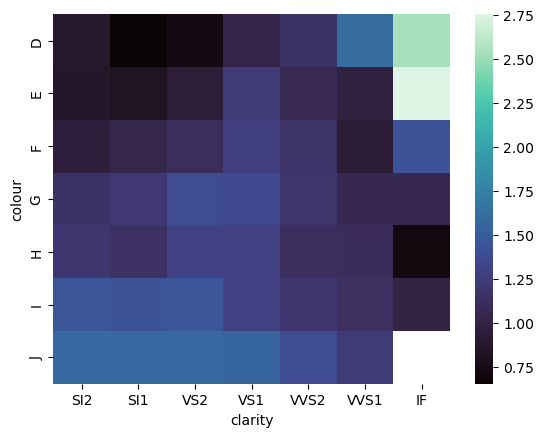

In [150]:
l = df[df['type'] == 'lab']
l_table = l.pivot_table(values = 'carat', aggfunc = 'mean', index = 'colour', columns = 'clarity')
l_table = l_table[['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
sns.heatmap(l_table, cmap = 'mako')

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

df = pd.read_csv('names.csv')

colors = ['#206095', '#004662', '#A8BD3A', '#27A0CC', '#118C7B', '#F66068']

def main_plot(names, gender):
    
    df_gender = df[df['sex'] == gender]
    
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 8))
    
    top_100_df = df_gender[df_gender['year'] == 2020].head(100)
    for name in top_100_df['name']:
        ax.plot(df_gender[df_gender['name']==name]['year'],
                df_gender[df_gender['name']==name]['rank'],
                color='lightgrey', alpha=0.5)
        
    
    i = 0
    for name in names[:6]:
        ax.plot(df_gender[df_gender['name']==name.capitalize()]['year'],
                df_gender[df_gender['name']==name.capitalize()]['rank'],
                color=colors[i], linewidth=2)
        ax.scatter(df_gender[df_gender['name']==name.capitalize()]['year'],
                   df_gender[df_gender['name']==name.capitalize()]['rank'])
        i = i + 1
    

    ax.invert_yaxis()
    ax.set_title('Popularity ranking (1 being the most popular)')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
    ax.set_xticks(range(1996, 2021, 2))
    ax.grid(axis='x')
    sns.despine(left=True, right=True, top=True)
    
#widgets
names_box = widgets.Text(value = '', placeholder = 'Enter names separated by space', description = 'Names:')
buttons = widgets.ToggleButtons(options=['Baby boy names', 'Baby girl names'], description = '', button_style = 'info')
final_plot = widgets.interactive_output(main_plot, {'names': names_box, 'gender': buttons})

display(widgets.VBox([buttons, names_box]))
display(final_plot)


Output()